In [6]:
import sys
import csv
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import numpy as np
from sklearn.metrics import accuracy_score

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score, KFold
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
wordnet_lemmatizer = WordNetLemmatizer()
nltk.download('stopwords')
nltk.download('wordnet')

from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()
from bs4 import BeautifulSoup
import re
import os 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\msaha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\msaha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [7]:
cwd = os.getcwd()
os.chdir("C:\\Users\\msaha\\Desktop\\Office\\Wind Invoices\\MS_Course\\MRP\\MRP_Tweet_Final\\Analysis\\Sentiment_Score\\")
cwd

'C:\\Users\\msaha\\MRP'

In [8]:
pattern_1 = r'@[A-Za-z0-9]+'
pattern_2 = r'https?://[A-Za-z0-9./]+'
comb_pat = r'|'.join((pattern_1, pattern_2))

def tweet_cleaner(text):
    sp = BeautifulSoup(text, 'lxml') #by using beautifulSoup package we will decode html to general text to avoid &amp, &quot
    sped = sp.get_text()
    stripped = re.sub(comb_pat, '', sped)
    try:
        clean = stripped.encode().decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        clean = stripped
    letters_only = re.sub("[^a-zA-Z]", " ", clean)
    letters_only1 = letters_only.replace('RT','')

    letters_only = [word for word in letters_only.split() if word not in stopwords.words('english') + ['amp'] + ['u']]
    lower_case = letters_only1.lower() #Here we will get white spaces those are not necessary, we need to tokenize and join these to remove these white spaces. 
    words = tok.tokenize(lower_case)
    return (" ".join(words)).strip()

In [9]:
all_train = pd.read_csv("All_Sentiment_Score.csv", encoding="latin-1")

In [10]:
all_train.tail()

,text,favoriteCount,replyToSN,created,replyToSID,statusSource,screenName,retweetCount,isRetweet,retweeted,Telco,cleaned_text,blobw,sentiment,Polarity_Score,Subjectivity_Score,Polarity
25097,Visit any of our stores before July 28 to ente...,0,NaN,2019-07-20 18:00,NaN,"<a href=""https://www.loomly.com/"" rel=""nofollo...",TomHarris,0,False,False,Telus,visit any of our stores before july to enter,visit any of our stores before july to enter,"Sentiment(polarity=0.0, subjectivity=0.0)",0.00,0.0,Neutral
25098,Plus de deux heures dÃattente pour Pitbull au...,0,NaN,2019-07-20 18:04,NaN,"<a href=""https://dlvrit.com/"" rel=""nofollow"">d...",icibasstlaurent,0,False,False,Telus,plus de deux heures d attente pour pitbull aux...,plus de deux heures d attente pour pitbull aux...,"Sentiment(polarity=0.0, subjectivity=0.0)",0.00,0.0,Neutral
25099,RT @acroghanlee: ThereÃs no day like #WorldEm...,0,NaN,2019-07-20 18:11,NaN,"<a href=""http://www.jainvarun.com"" rel=""nofoll...",codervj,1,True,False,Telus,there s no day like worldemojiday to celebrate...,there s no day like worldemojiday to celebrate...,"Sentiment(polarity=0.15, subjectivity=0.1)",0.15,0.1,Positive
25100,RT @NASA: Three space travelers will join the ...,0,NaN,2019-07-20 18:13,NaN,"<a href=""http://twitter.com/download/iphone"" r...",TELUS_Spark,601,True,False,Telus,three space travelers will join the rest of ex...,three space travelers will join the rest of ex...,"Sentiment(polarity=0.0, subjectivity=0.0)",0.00,0.0,Neutral
25101,Love my @onepeloton; but it requires a reliabl...,0,NaN,2019-07-20 18:18,NaN,"<a href=""http://tapbots.com/tweetbot"" rel=""nof...",buzzbishop,0,False,False,Telus,love my but it requires a reliable internet co...,love my but it requires a reliable internet co...,"Sentiment(polarity=0.35, subjectivity=0.4)",0.35,0.4,Positive


In [11]:
#Remove unnecessary column from dataframe.
all_train.drop(['favoriteCount','replyToSN','created','replyToSID','statusSource'],  axis=1, inplace=True)

In [12]:
sum(all_train.Telco.value_counts())

25102

In [13]:
all_train.Polarity.value_counts()

Neutral     14009
Positive     7960
Negative     3133
Name: Polarity, dtype: int64

In [14]:
all_train['clean_text'] = all_train['text'].apply(lambda x : tweet_cleaner(x))

C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:335: UserWarning: "https://t.co/bX5AH20nWG" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:335: UserWarning: "https://t.co/vT58ChLAiN" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:335: UserWarning: "https://t.co/OLatmbu8fb" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to

In [15]:
cnt_vectorizer  = CountVectorizer()
train_set_X = cnt_vectorizer.fit_transform(all_train['clean_text'].values.astype('U'))


In [16]:
train_set_X

<25102x30446 sparse matrix of type '<class 'numpy.int64'>'
	with 283321 stored elements in Compressed Sparse Row format>

In [17]:
train_set_Y = np.where(all_train.Polarity == 'Positive', 1, 
         (np.where(all_train.Polarity == 'Negative', 2, 3)))

In [18]:
train_set_Y

array([1, 3, 1, ..., 1, 3, 1])

In [19]:
kfold = KFold(n_splits = 5, shuffle = True, random_state=1234)

In [21]:
print (train_set_Y.shape)
print (train_set_X.shape)

(25102,)
(25102, 30446)


In [22]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import accuracy_score

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [23]:
from IPython.display import Image

In [24]:
log_cnt_mdl = LogisticRegressionCV()
log_count_score = cross_val_score(log_cnt_mdl,
                                  train_set_X, train_set_Y,
                                  scoring = 'accuracy',
                                  cv = kfold.split(train_set_X),
                                  n_jobs=-1).mean()
print (log_count_score)

0.9381327270087148


In [25]:
svc_count_model = LinearSVC()
svc_count_score = cross_val_score(svc_count_model,
                                  train_set_X, train_set_Y,
                                  scoring = 'accuracy',
                                  cv = kfold.split(train_set_X),
                                  n_jobs=-1).mean()
print (svc_count_score)

0.945582140666571


In [26]:
nb_count_model = MultinomialNB()
nb_count_score = cross_val_score(nb_count_model, 
                                 train_set_X, train_set_Y,
                                 scoring = 'accuracy', 
                                 cv = kfold.split(train_set_X,),
                                 n_jobs=-1).mean()
print (nb_count_score)

0.7433270542605519


In [27]:
gb_count_model = GradientBoostingClassifier()
gb_count_score = cross_val_score(gb_count_model, 
                                 train_set_X, train_set_Y,
                                 scoring = 'accuracy', 
                                 cv = kfold.split(train_set_X),
                                 n_jobs=-1).mean()
print (gb_count_score)

0.8101746687815556


In [28]:
rf_count_model = RandomForestClassifier()
rf_count_score = cross_val_score(rf_count_model, 
                                 train_set_X, train_set_Y,
                                 scoring = 'accuracy', 
                                 cv = kfold.split(train_set_X),
                                 n_jobs=-1).mean()
print (rf_count_score)

0.8106524072996997


In [29]:
# TF-IDF Vectorizer
#Create a list of cleaned tweets
tweets = all_train.clean_text.values.astype('U')

In [30]:
tfidf_vectorizer = TfidfVectorizer(stop_words=None, max_features=17000, ngram_range=(1, 3))
train_set_X = tfidf_vectorizer.fit_transform(tweets) #Transform tweets list into TF-IDV vector

In [31]:
log_tfidf_model = LogisticRegressionCV()
log_tfidf_score = cross_val_score(log_tfidf_model,
                                  train_set_X, train_set_Y,
                                  scoring = 'accuracy',
                                  cv = kfold.split(train_set_X),
                                  n_jobs=-1).mean()
print (log_tfidf_score)

0.9087323916840109


In [32]:
svc_tfidf_model = LinearSVC()
svc_tfidf_score = cross_val_score(svc_tfidf_model,
                                  train_set_X, train_set_Y,
                                  scoring = 'accuracy',
                                  cv = kfold.split(train_set_X),
                                  n_jobs=-1).mean()
print (svc_tfidf_score)

0.9131145444114799


In [33]:
nb_tfidf_model = MultinomialNB()
nb_tfidf_score = cross_val_score(nb_tfidf_model, 
                                 train_set_X, train_set_Y,
                                 scoring = 'accuracy', 
                                 cv = kfold.split(train_set_X,),
                                 n_jobs=-1).mean()
print (nb_tfidf_score)

0.8110109095583409


In [34]:
gb_tfidf_model = GradientBoostingClassifier()
gb_tfidf_score = cross_val_score(gb_tfidf_model, 
                                 train_set_X, train_set_Y,
                                 scoring = 'accuracy', 
                                 cv = kfold.split(train_set_X),
                                 n_jobs=-1).mean()
print (gb_tfidf_score)

0.8086212330522562


In [35]:
rf_tfidf_model  = RandomForestClassifier()
rf_tfidf_score = cross_val_score(rf_tfidf_model, 
                                 train_set_X, train_set_Y,
                                 scoring = 'accuracy', 
                                 cv = kfold.split(train_set_X),
                                 n_jobs=-1).mean()
print (rf_tfidf_score)

0.8073864272049424


In [36]:
selected_model = LinearSVC().fit(train_set_X, train_set_Y)

In [37]:
result = {
    'label' : ['log_count_score' , 'svc_count_score',
               'nb_count_score', 'gb_count_score',
              'rf_count_score', 'log_tfidf_score',
              'svc_tfidf_score', 'nb_tfidf_score',
              'gb_tfidf_score', 'rf_tfidf_score',
              ],
    'score' : [log_count_score , svc_count_score,
               nb_count_score, gb_count_score,
              rf_count_score, log_tfidf_score,
              svc_tfidf_score, nb_tfidf_score,
              gb_tfidf_score, rf_tfidf_score]
}

df_result = pd.DataFrame(result)
display(df_result.sort_values('score', ascending=False))

,label,score
1,svc_count_score,0.945582
0,log_count_score,0.938133
6,svc_tfidf_score,0.913115
5,log_tfidf_score,0.908732
7,nb_tfidf_score,0.811011
4,rf_count_score,0.810652
3,gb_count_score,0.810175
8,gb_tfidf_score,0.808621
9,rf_tfidf_score,0.807386
2,nb_count_score,0.743327


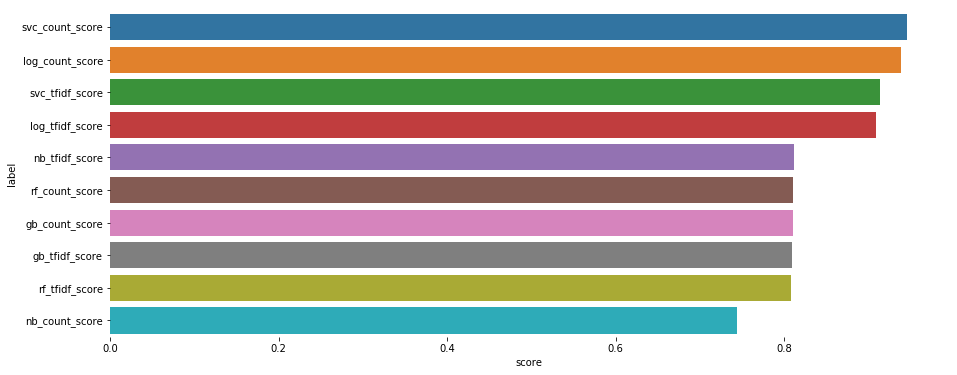

In [38]:
import  seaborn  as sns
df_result = df_result.sort_values('score', ascending=False)
f, ax = plt.subplots(figsize=(15, 6))
sns.set_color_codes("pastel")
ax = sns.barplot(x='score', y='label', data=df_result, orient='h')
sns.despine(left=True, bottom=True)

In [39]:
#oversampling
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import ADASYN, SMOTE, RandomOverSampler

ROS_pl = make_pipeline(cnt_vectorizer, RandomOverSampler(random_state=777),log_cnt_mdl)
SMOTE_pl = make_pipeline(cnt_vectorizer, SMOTE(random_state=777),log_cnt_mdl)
ADASYN_pl = make_pipeline(cnt_vectorizer, ADASYN(ratio='minority',random_state=777),log_cnt_mdl)

In [41]:
def find_accuracy(splits, X, Y, pipeline, average_method):
    
    kfold = StratifiedKFold(n_splits=splits, shuffle=True, random_state=777)
    accuracy = []
    precision = []
    recall = []
    f1 = []
    for train, test in kfold.split(X, Y):
        lnr_fit = pipeline.fit(X[train], Y[train])
        pred = lnr_fit.predict(X[test])
        scr = lnr_fit.score(X[test],Y[test])
        
        accuracy.append(scr * 100)
        precision.append(precision_score(Y[test], pred, average=average_method)*100)
        print('              negative    neutral     positive')
        print('precision:',precision_score(Y[test], pred, average=None))
        recall.append(recall_score(Y[test], pred, average=average_method)*100)
        print('recall:   ',recall_score(Y[test], pred, average=None))
        f1.append(f1_score(Y[test], pred, average=average_method)*100)
        print('f1 score: ',f1_score(Y[test], pred, average=None))
        print('-'*50)

    print("avg. accuracy: %.2f%% (+/- %.2f%%)" % (np.mean(accuracy), np.std(accuracy)))
    print("avg. precision: %.2f%% (+/- %.2f%%)" % (np.mean(precision), np.std(precision)))
    print("avg. recall: %.2f%% (+/- %.2f%%)" % (np.mean(recall), np.std(recall)))
    print("avg. f1 score: %.2f%% (+/- %.2f%%)" % (np.mean(f1), np.std(f1)))

In [43]:
count_lr_pipeline = Pipeline([
    ('vectorizer', cnt_vectorizer),
    ('classifier', log_cnt_mdl)
])

In [44]:
find_accuracy(5, all_train.clean_text, all_train.Polarity, count_lr_pipeline, 'macro')

              negative    neutral     positive
precision: [0.86749117 0.94176088 0.94270833]
recall:    [0.7830941  0.98108494 0.90954774]
f1 score:  [0.82313495 0.9610208  0.9258312 ]
--------------------------------------------------
              negative    neutral     positive
precision: [0.8975265  0.95457698 0.94143857]
recall:    [0.81020734 0.98251249 0.9290201 ]
f1 score:  [0.85163453 0.9683433  0.93518811]
--------------------------------------------------
              negative    neutral     positive
precision: [0.88490566 0.93987772 0.93794441]
recall:    [0.74800638 0.98750892 0.91143216]
f1 score:  [0.81071737 0.96310477 0.92449825]
--------------------------------------------------
              negative    neutral     positive
precision: [0.89814815 0.94854202 0.94121406]
recall:    [0.77476038 0.98679515 0.92525126]
f1 score:  [0.83190395 0.96729054 0.9331644 ]
--------------------------------------------------
              negative    neutral     positive
precision

In [45]:
count_svc_pipeline = Pipeline([
    ('vectorizer', cnt_vectorizer),
    ('classifier', svc_count_model)
])

In [47]:
find_accuracy(5, all_train.clean_text, all_train.Polarity, count_svc_pipeline, 'macro')

              negative    neutral     positive
precision: [0.87348354 0.95043029 0.94866797]
recall:    [0.80382775 0.98536759 0.91708543]
f1 score:  [0.8372093  0.96758367 0.93260939]
--------------------------------------------------
              negative    neutral     positive
precision: [0.92212389 0.96211331 0.95060165]
recall:    [0.83094099 0.98786581 0.9428392 ]
f1 score:  [0.87416107 0.97481951 0.94670451]
--------------------------------------------------
              negative    neutral     positive
precision: [0.8988764  0.94740437 0.94611931]
recall:    [0.76555024 0.99000714 0.92650754]
f1 score:  [0.82687339 0.96823735 0.93621073]
--------------------------------------------------
              negative    neutral     positive
precision: [0.89818182 0.95523416 0.94827586]
recall:    [0.78913738 0.99000714 0.93278894]
f1 score:  [0.84013605 0.97230985 0.94046865]
--------------------------------------------------
              negative    neutral     positive
precision

In [48]:
count_nb_pipeline = Pipeline([
    ('vectorizer', cnt_vectorizer),
    ('classifier', nb_count_model)
])

In [49]:
find_accuracy(5, all_train.clean_text, all_train.Polarity, count_nb_pipeline, 'macro')

              negative    neutral     positive
precision: [0.75730994 0.95474035 0.58643411]
recall:    [0.41307815 0.71520343 0.95037688]
f1 score:  [0.53457172 0.81779229 0.7253116 ]
--------------------------------------------------
              negative    neutral     positive
precision: [0.82594937 0.95359848 0.58195141]
recall:    [0.41626794 0.71877231 0.94786432]
f1 score:  [0.55355249 0.81969882 0.72114695]
--------------------------------------------------
              negative    neutral     positive
precision: [0.83601286 0.95837414 0.57421289]
recall:    [0.41467305 0.69842969 0.96231156]
f1 score:  [0.554371   0.80800991 0.71924883]
--------------------------------------------------
              negative    neutral     positive
precision: [0.82278481 0.96005706 0.58477509]
recall:    [0.41533546 0.72055675 0.95540201]
f1 score:  [0.55201699 0.82324159 0.72549487]
--------------------------------------------------
              negative    neutral     positive
precision

In [50]:
count_gb_pipeline = Pipeline([
    ('vectorizer', cnt_vectorizer),
    ('classifier', gb_count_model)
])

In [52]:
find_accuracy(5, all_train.clean_text, all_train.Polarity, count_gb_pipeline, 'macro')

              negative    neutral     positive
precision: [0.86909091 0.76789168 0.93078971]
recall:    [0.38118022 0.99179158 0.6589196 ]
f1 score:  [0.52993348 0.86559726 0.77160721]
--------------------------------------------------
              negative    neutral     positive
precision: [0.88932806 0.76944368 0.93246753]
recall:    [0.35885167 0.99214847 0.67650754]
f1 score:  [0.51136364 0.86671863 0.78412814]
--------------------------------------------------
              negative    neutral     positive
precision: [0.87037037 0.77703456 0.93637145]
recall:    [0.37480064 0.99500357 0.68404523]
f1 score:  [0.52396878 0.87261346 0.79056261]
--------------------------------------------------
              negative    neutral     positive
precision: [0.85823755 0.76738411 0.92070485]
recall:    [0.35782748 0.99250535 0.65640704]
f1 score:  [0.50507328 0.86554622 0.76640997]
--------------------------------------------------
              negative    neutral     positive
precision

In [54]:
count_rf_pipeline = Pipeline([
    ('vectorizer', cnt_vectorizer),
    ('classifier', rf_count_model)
])

In [55]:
find_accuracy(5, all_train.clean_text, all_train.Polarity, count_rf_pipeline, 'macro')

              negative    neutral     positive
precision: [0.79104478 0.78271097 0.83210059]
recall:    [0.33811802 0.95003569 0.70665829]
f1 score:  [0.47374302 0.85829437 0.7642663 ]
--------------------------------------------------
              negative    neutral     positive
precision: [0.79807692 0.80340604 0.84434655]
recall:    [0.39712919 0.95967166 0.72236181]
f1 score:  [0.53035144 0.87461376 0.77860528]
--------------------------------------------------
              negative    neutral     positive
precision: [0.8        0.79230081 0.81571429]
recall:    [0.34449761 0.94753747 0.71733668]
f1 score:  [0.48160535 0.86299366 0.76336898]
--------------------------------------------------
              negative    neutral     positive
precision: [0.78709677 0.8        0.86217228]
recall:    [0.38977636 0.96359743 0.72298995]
f1 score:  [0.52136752 0.87421078 0.78647079]
--------------------------------------------------
              negative    neutral     positive
precision

In [56]:
#Check model score with TFIDF vectorizer

tfidf_lr_pipeline = Pipeline([
    ('vectorizer', tfidf_vectorizer),
    ('classifier', log_tfidf_model)
])


In [57]:
find_accuracy(5, all_train.clean_text, all_train.Polarity, tfidf_lr_pipeline, 'macro')

              negative    neutral     positive
precision: [0.84369115 0.91768293 0.91872562]
recall:    [0.71451356 0.96680942 0.88756281]
f1 score:  [0.77374784 0.94160584 0.9028754 ]
--------------------------------------------------
              negative    neutral     positive
precision: [0.86728972 0.93026451 0.92      ]
recall:    [0.7400319  0.96645253 0.91017588]
f1 score:  [0.79862306 0.9480133  0.91506157]
--------------------------------------------------
              negative    neutral     positive
precision: [0.84819734 0.92825266 0.90322581]
recall:    [0.71291866 0.96502498 0.89698492]
f1 score:  [0.77469671 0.94628171 0.90009455]
--------------------------------------------------
              negative    neutral     positive
precision: [0.88062622 0.92213533 0.9119898 ]
recall:    [0.71884984 0.96788009 0.89824121]
f1 score:  [0.79155673 0.94445412 0.90506329]
--------------------------------------------------
              negative    neutral     positive
precision

In [58]:
tfidf_svc_pipeline = Pipeline([
    ('vectorizer', tfidf_vectorizer),
    ('classifier', svc_tfidf_model)
])

In [59]:
find_accuracy(5, all_train.clean_text, all_train.Polarity, tfidf_svc_pipeline, 'macro')

              negative    neutral     positive
precision: [0.872      0.91318865 0.92463958]
recall:    [0.6953748  0.97608851 0.88630653]
f1 score:  [0.77373558 0.94359151 0.90506735]
--------------------------------------------------
              negative    neutral     positive
precision: [0.91252485 0.92596349 0.93076923]
recall:    [0.73205742 0.97751606 0.9120603 ]
f1 score:  [0.81238938 0.95104167 0.9213198 ]
--------------------------------------------------
              negative    neutral     positive
precision: [0.88118812 0.91958277 0.91839378]
recall:    [0.70972887 0.97537473 0.89070352]
f1 score:  [0.78621908 0.94665743 0.90433673]
--------------------------------------------------
              negative    neutral     positive
precision: [0.91041667 0.91719533 0.92491909]
recall:    [0.69808307 0.98037116 0.89761307]
f1 score:  [0.79023508 0.94773159 0.91106152]
--------------------------------------------------
              negative    neutral     positive
precision

In [60]:
tfidf_nb_pipeline = Pipeline([
    ('vectorizer', tfidf_vectorizer),
    ('classifier', nb_tfidf_model)
])

In [61]:
find_accuracy(5, all_train.clean_text, all_train.Polarity, tfidf_nb_pipeline, 'macro')

              negative    neutral     positive
precision: [0.91970803 0.83322663 0.75113636]
recall:    [0.20095694 0.9289793  0.83040201]
f1 score:  [0.32984293 0.87850152 0.78878282]
--------------------------------------------------
              negative    neutral     positive
precision: [0.96062992 0.83776852 0.74873239]
recall:    [0.19457735 0.93254818 0.83479899]
f1 score:  [0.32360743 0.88262118 0.78942679]
--------------------------------------------------
              negative    neutral     positive
precision: [0.9296875  0.83890675 0.74761638]
recall:    [0.18979266 0.93112063 0.83731156]
f1 score:  [0.31523179 0.88261164 0.78992593]
--------------------------------------------------
              negative    neutral     positive
precision: [0.94656489 0.82393701 0.75495916]
recall:    [0.19808307 0.93361884 0.81281407]
f1 score:  [0.32760898 0.87535553 0.78281912]
--------------------------------------------------
              negative    neutral     positive
precision

In [62]:
tfidf_gb_pipeline = Pipeline([
    ('vectorizer', tfidf_vectorizer),
    ('classifier', gb_tfidf_model)
])

In [63]:
find_accuracy(5, all_train.clean_text, all_train.Polarity, tfidf_gb_pipeline, 'macro')

              negative    neutral     positive
precision: [0.88       0.76803981 0.93002657]
recall:    [0.38596491 0.99143469 0.65954774]
f1 score:  [0.53658537 0.86555538 0.77177508]
--------------------------------------------------
              negative    neutral     positive
precision: [0.88679245 0.77188108 0.93604149]
recall:    [0.37480064 0.99143469 0.68027638]
f1 score:  [0.52690583 0.86798938 0.78792288]
--------------------------------------------------
              negative    neutral     positive
precision: [0.86029412 0.77799497 0.93321918]
recall:    [0.37320574 0.99428979 0.68467337]
f1 score:  [0.52057842 0.87294376 0.78985507]
--------------------------------------------------
              negative    neutral     positive
precision: [0.84269663 0.76946523 0.9222028 ]
recall:    [0.35942492 0.9910778  0.66268844]
f1 score:  [0.50391937 0.86632351 0.77119883]
--------------------------------------------------
              negative    neutral     positive
precision

In [64]:
tfidf_rf_pipeline = Pipeline([
    ('vectorizer', tfidf_vectorizer),
    ('classifier', rf_tfidf_model)
])

In [65]:
find_accuracy(5, all_train.clean_text, all_train.Polarity, tfidf_rf_pipeline, 'macro')

              negative    neutral     positive
precision: [0.784375   0.7973462  0.82021661]
recall:    [0.40031898 0.94361171 0.71356784]
f1 score:  [0.53009504 0.86433475 0.76318441]
--------------------------------------------------
              negative    neutral     positive
precision: [0.82153846 0.8038032  0.83947939]
recall:    [0.42583732 0.95039258 0.72927136]
f1 score:  [0.56092437 0.87097302 0.7805042 ]
--------------------------------------------------
              negative    neutral     positive
precision: [0.75496689 0.79854809 0.81174805]
recall:    [0.36363636 0.94218415 0.72047739]
f1 score:  [0.49085038 0.86444008 0.76339434]
--------------------------------------------------
              negative    neutral     positive
precision: [0.76811594 0.78411105 0.81590574]
recall:    [0.33865815 0.94753747 0.6959799 ]
f1 score:  [0.47006652 0.85811248 0.75118644]
--------------------------------------------------
              negative    neutral     positive
precision

In [66]:
#Check accuracy score after applying over sampling with logistic regression classifier
find_accuracy(5, all_train.clean_text, all_train.Polarity, ROS_pl, 'macro')

              negative    neutral     positive
precision: [0.83747927 0.9445019  0.94264997]
recall:    [0.80542265 0.97787295 0.89824121]
f1 score:  [0.82113821 0.96089777 0.91990994]
--------------------------------------------------
              negative    neutral     positive
precision: [0.85385878 0.95969155 0.94162925]
recall:    [0.82934609 0.97715917 0.92211055]
f1 score:  [0.84142395 0.9683466  0.93176769]
--------------------------------------------------
              negative    neutral     positive
precision: [0.85816876 0.9422617  0.93949252]
recall:    [0.76236045 0.98429693 0.90703518]
f1 score:  [0.80743243 0.96282074 0.92297859]
--------------------------------------------------
              negative    neutral     positive
precision: [0.86324786 0.9533195  0.94491251]
recall:    [0.80670927 0.98394004 0.91582915]
f1 score:  [0.83402147 0.96838778 0.93014354]
--------------------------------------------------
              negative    neutral     positive
precision

In [67]:
find_accuracy(5, all_train.clean_text, all_train.Polarity, SMOTE_pl, 'macro')

              negative    neutral     positive
precision: [0.83031301 0.94486561 0.94708995]
recall:    [0.80382775 0.97858672 0.89949749]
f1 score:  [0.81685575 0.96143058 0.92268041]
--------------------------------------------------
              negative    neutral     positive
precision: [0.85858586 0.95668879 0.94053708]
recall:    [0.81339713 0.97751606 0.92399497]
f1 score:  [0.83538084 0.96699029 0.93219265]
--------------------------------------------------
              negative    neutral     positive
precision: [0.86520947 0.94236016 0.94155844]
recall:    [0.75757576 0.98608137 0.91080402]
f1 score:  [0.80782313 0.96372515 0.92592593]
--------------------------------------------------
              negative    neutral     positive
precision: [0.85837651 0.95160733 0.94121447]
recall:    [0.79392971 0.98251249 0.91520101]
f1 score:  [0.82489627 0.96681299 0.92802548]
--------------------------------------------------
              negative    neutral     positive
precision

In [68]:
find_accuracy(5, all_train.clean_text, all_train.Polarity, ADASYN_pl, 'macro')

              negative    neutral     positive
precision: [0.72751678 0.95561169 0.94152824]
recall:    [0.86443381 0.94503926 0.89007538]
f1 score:  [0.79008746 0.95029607 0.91507911]
--------------------------------------------------
              negative    neutral     positive
precision: [0.69785082 0.96541575 0.93849206]
recall:    [0.88038278 0.93647395 0.89133166]
f1 score:  [0.77856135 0.95072464 0.91430412]
--------------------------------------------------
              negative    neutral     positive
precision: [0.71994536 0.95       0.94761585]
recall:    [0.84051037 0.94932191 0.88630653]
f1 score:  [0.77557027 0.94966084 0.91593638]
--------------------------------------------------
              negative    neutral     positive
precision: [0.68863049 0.95322058 0.95160191]
recall:    [0.8514377  0.94539615 0.87688442]
f1 score:  [0.76142857 0.94929224 0.91271657]
--------------------------------------------------
              negative    neutral     positive
precision

In [69]:
#Check accuracy score after applying over sampling with Linear SVC classifier
ROS_pl_svc = make_pipeline(cnt_vectorizer, RandomOverSampler(random_state=777),svc_count_model)
SMOTE_pl_svc = make_pipeline(cnt_vectorizer, SMOTE(random_state=777),svc_count_model)
ADASYN_pl_svc = make_pipeline(cnt_vectorizer, ADASYN(ratio='minority',random_state=777),svc_count_model)


In [70]:
find_accuracy(5, all_train.clean_text, all_train.Polarity, ROS_pl_svc, 'macro')

              negative    neutral     positive
precision: [0.84717608 0.95178633 0.94270833]
recall:    [0.81339713 0.9793005  0.90954774]
f1 score:  [0.82994304 0.96534741 0.9258312 ]
--------------------------------------------------
              negative    neutral     positive
precision: [0.88195616 0.9629241  0.94391332]
recall:    [0.83413078 0.98251249 0.93027638]
f1 score:  [0.85737705 0.97261968 0.93704524]
--------------------------------------------------
              negative    neutral     positive
precision: [0.87791741 0.94987985 0.94390716]
recall:    [0.77990431 0.98750892 0.91959799]
f1 score:  [0.82601351 0.96832896 0.93159402]
--------------------------------------------------
              negative    neutral     positive
precision: [0.8791019  0.95977809 0.95054592]
recall:    [0.81309904 0.98786581 0.92964824]
f1 score:  [0.84481328 0.97361942 0.93998095]
--------------------------------------------------
              negative    neutral     positive
precision

In [71]:
find_accuracy(5, all_train.clean_text, all_train.Polarity, SMOTE_pl_svc, 'macro')

              negative    neutral     positive
precision: [0.84551495 0.95219952 0.94582245]
recall:    [0.81180223 0.98108494 0.91017588]
f1 score:  [0.8283157  0.96642644 0.92765685]
--------------------------------------------------
              negative    neutral     positive
precision: [0.88026981 0.96392294 0.94214876]
recall:    [0.83253589 0.9821556  0.93090452]
f1 score:  [0.8557377  0.97295386 0.93649289]
--------------------------------------------------
              negative    neutral     positive
precision: [0.88086643 0.95157967 0.94598071]
recall:    [0.77830941 0.98893647 0.92399497]
f1 score:  [0.82641829 0.96989849 0.9348586 ]
--------------------------------------------------
              negative    neutral     positive
precision: [0.87326389 0.95680719 0.95096774]
recall:    [0.80351438 0.9882227  0.9258794 ]
f1 score:  [0.83693844 0.97226124 0.93825589]
--------------------------------------------------
              negative    neutral     positive
precision

In [72]:
find_accuracy(5, all_train.clean_text, all_train.Polarity, ADASYN_pl_svc, 'macro')

              negative    neutral     positive
precision: [0.76595745 0.95868946 0.94496021]
recall:    [0.86124402 0.96074233 0.8951005 ]
f1 score:  [0.81081081 0.9597148  0.91935484]
--------------------------------------------------
              negative    neutral     positive
precision: [0.76077886 0.96756757 0.94891945]
recall:    [0.87240829 0.95824411 0.91017588]
f1 score:  [0.8127786  0.96288327 0.92914396]
--------------------------------------------------
              negative    neutral     positive
precision: [0.75641026 0.95494856 0.952     ]
recall:    [0.84688995 0.96074233 0.89698492]
f1 score:  [0.79909707 0.95783668 0.923674  ]
--------------------------------------------------
              negative    neutral     positive
precision: [0.74027778 0.96062992 0.94754316]
recall:    [0.8514377  0.95788722 0.89635678]
f1 score:  [0.79197623 0.95925661 0.92123951]
--------------------------------------------------
              negative    neutral     positive
precision

In [75]:
result = {
    'label' : ['LOG_SCORE' , 'SVC_SCORE',
              'nb_count_score', 'gb_count_score',
              'rf_count_score', 'log_tfidf_score',
              'svc_tfidf_score', 'nb_tfidf_score',
              'gb_tfidf_score', 'rf_tfidf_score',
              ],
    'score' : [log_count_score , svc_count_score,
               nb_count_score, gb_count_score,
              rf_count_score, log_tfidf_score,
              svc_tfidf_score, nb_tfidf_score,
              gb_tfidf_score, rf_tfidf_score]
}

df_result = pd.DataFrame(result)
display(df_result.sort_values('score', ascending=False))

,label,score
1,SVC_SCORE,0.945582
0,LOG_SCORE,0.938133
6,svc_tfidf_score,0.913115
5,log_tfidf_score,0.908732
7,nb_tfidf_score,0.811011
4,rf_count_score,0.810652
3,gb_count_score,0.810175
8,gb_tfidf_score,0.808621
9,rf_tfidf_score,0.807386
2,nb_count_score,0.743327


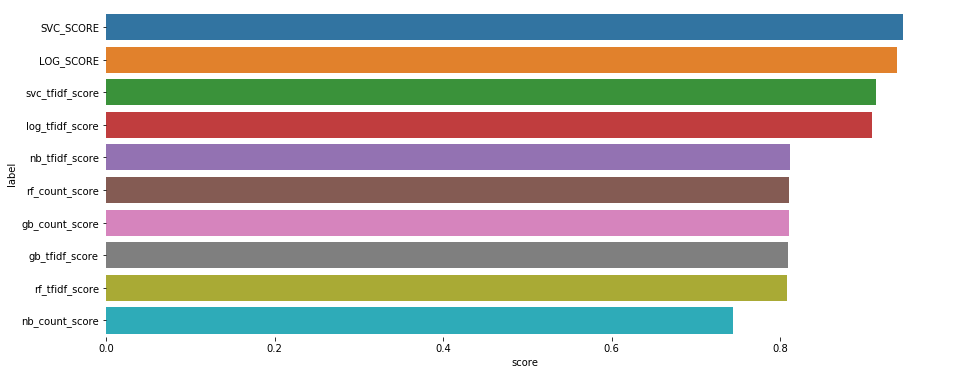

In [76]:
import  seaborn  as sns
df_result = df_result.sort_values('score', ascending=False)
f, ax = plt.subplots(figsize=(15, 6))
sns.set_color_codes("pastel")
ax = sns.barplot(x='score', y='label', data=df_result, orient='h')
sns.despine(left=True, bottom=True)